In [1]:
import pandas as pd
import os
import numpy as np

### check the work directory

In [2]:
os.getcwd()

'C:\\Users\\jliu020'

## change directory

In [3]:
os.chdir(r"H:\Jingchun\Healthcare Data Analytics\pandas\Sales_Data")

## combine 12 files to 1

In [4]:
files=[file for file in os.listdir('./')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./'+file)
    all_months_data=pd.concat([all_months_data,df])


C:\Users\jliu020\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## save combined file to csv

In [42]:
all_months_data.to_csv('all_data.csv',index=False)

In [50]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

C:\Users\jliu020\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,4,5,10,11,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Order_ID,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute,Grouped
0,141234,iPhone,1,700.0,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean up the data somehow there are extra unnamed column

In [51]:
all_data = all_data[['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address']]

In [52]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.0,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"


## Get rid of the blank space in the column names

In [53]:
all_data.columns=all_data.columns.str.replace(' ','_')

## Drop all NaN and duplicated values

In [54]:
all_data=all_data.dropna(how='all')
all_data=all_data.drop_duplicates()

## Get rid of the rows with headers

In [55]:
all_data.isnull().mean()

Order_ID            0.000051
Product             0.000000
Quantity_Ordered    0.000051
Price_Each          0.000051
Order_Date          0.000051
Purchase_Address    0.000051
dtype: float64

In [64]:
all_data.sort_values('Order_Date')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
468434,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01
...,...,...,...,...,...,...,...
121650,258121,Bose SoundSport Headphones,1,99.99,9/9/2019 9:51,"992 Lake St, San Francisco, CA 94016",9/
114595,251303,Macbook Pro Laptop,1,1700.0,9/9/2019 9:52,"25 Lake St, New York City, NY 10001",9/
112384,249174,Bose SoundSport Headphones,1,99.99,9/9/2019 9:52,"808 Adams St, Austin, TX 73301",9/
113381,250134,Wired Headphones,2,11.99,9/9/2019 9:58,"146 8th St, Los Angeles, CA 90001",9/


In [65]:
all_data.sort_values('Order_Date').iloc[:-1]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
468434,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01
...,...,...,...,...,...,...,...
113131,249891,Macbook Pro Laptop,1,1700.0,9/9/2019 9:48,"177 Center St, Portland, OR 97035",9/
121650,258121,Bose SoundSport Headphones,1,99.99,9/9/2019 9:51,"992 Lake St, San Francisco, CA 94016",9/
114595,251303,Macbook Pro Laptop,1,1700.0,9/9/2019 9:52,"25 Lake St, New York City, NY 10001",9/
112384,249174,Bose SoundSport Headphones,1,99.99,9/9/2019 9:52,"808 Adams St, Austin, TX 73301",9/


In [66]:
all_data=all_data.sort_values('Order_Date').iloc[:-1]

In [67]:
all_data.sort_values('Order_Date')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
468434,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01
...,...,...,...,...,...,...,...
113131,249891,Macbook Pro Laptop,1,1700.0,9/9/2019 9:48,"177 Center St, Portland, OR 97035",9/
121650,258121,Bose SoundSport Headphones,1,99.99,9/9/2019 9:51,"992 Lake St, San Francisco, CA 94016",9/
112384,249174,Bose SoundSport Headphones,1,99.99,9/9/2019 9:52,"808 Adams St, Austin, TX 73301",9/
114595,251303,Macbook Pro Laptop,1,1700.0,9/9/2019 9:52,"25 Lake St, New York City, NY 10001",9/


In [68]:
all_data=all_data.drop(columns='Month')

In [69]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
468434,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [70]:
all_data.isnull().mean()

Order_ID            0.0
Product             0.0
Quantity_Ordered    0.0
Price_Each          0.0
Order_Date          0.0
Purchase_Address    0.0
dtype: float64

In [58]:
all_data=all_data.dropna(axis=0)

## Insert month column from Order_Date

In [72]:
all_data['Month']=all_data['Order_Date'].apply(lambda x:x.split('/')[0])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
468434,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01


In [80]:
all_data.loc[all_data['Month']=='09']

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
415332,241054,AAA Batteries (4-pack),1,2.99,09/01/19 00:25,"175 South St, San Francisco, CA 94016",09
419425,244953,Lightning Charging Cable,1,14.95,09/01/19 00:26,"262 Park St, Los Angeles, CA 90001",09
418073,243667,USB-C Charging Cable,1,11.95,09/01/19 00:55,"959 Center St, San Francisco, CA 94016",09
420666,246139,20in Monitor,1,109.99,09/01/19 01:00,"761 Forest St, San Francisco, CA 94016",09
413494,239285,34in Ultrawide Monitor,1,379.99,09/01/19 01:09,"373 1st St, San Francisco, CA 94016",09
...,...,...,...,...,...,...,...
578400,258569,Bose SoundSport Headphones,1,99.99,09/30/19 23:32,"557 Johnson St, Boston, MA 02215",09
576497,256741,Wired Headphones,1,11.99,09/30/19 23:34,"475 5th St, San Francisco, CA 94016",09
573966,254306,Apple Airpods Headphones,1,150,09/30/19 23:53,"509 6th St, San Francisco, CA 94016",09
573965,254306,iPhone,1,700,09/30/19 23:53,"509 6th St, San Francisco, CA 94016",09


In [81]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
468434,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01


## change the 'Month' type to int

In [82]:
all_data['Month']=all_data.Month.astype(int)

In [77]:
all_data=all_data.dropna(how='all')

In [80]:
nadf=all_data.isna()
nadf.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False


## Check if there is any NaN values

In [83]:
all_data.isna().mean()

Order_ID            0.0
Product             0.0
Quantity_Ordered    0.0
Price_Each          0.0
Order_Date          0.0
Purchase_Address    0.0
Month               0.0
dtype: float64

# Change the columns to numeric

In [84]:
all_data['Quantity_Ordered']=pd.to_numeric(all_data['Quantity_Ordered'])
all_data['Price_Each']=pd.to_numeric(all_data['Price_Each'])

## Add 'Sales' Column by Quantity_Ordered*Price_Each

In [85]:
all_data['Sales']=all_data['Quantity_Ordered']*all_data['Price_Each']

## Group data by Month

In [86]:
all_data_gbmonth=all_data.groupby('Month')

## Check how many groups (It shoulbe be 12)

In [87]:
all_data_gbmonth.ngroups

12

In [88]:
all_data_gbmonth.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95
468434,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90
466687,147663,Lightning Charging Cable,1,14.95,02/01/19 00:33,"96 Elm St, Boston, MA 02215",2,14.95
464126,145212,Lightning Charging Cable,1,14.95,02/01/19 00:36,"484 6th St, Dallas, TX 75001",2,14.95
466313,147309,Macbook Pro Laptop,1,1700.00,02/01/19 01:01,"594 South St, Dallas, TX 75001",2,1700.00
465402,146442,USB-C Charging Cable,1,11.95,02/01/19 01:48,"229 West St, Los Angeles, CA 90001",2,11.95
458351,160509,AAA Batteries (4-pack),2,2.99,02/01/19 01:51,"597 Chestnut St, Austin, TX 73301",2,5.98


## Summerize the group data by Month 

In [89]:
all_data_gbmonth.Sales.agg(['sum','max','min'])

,sum,max,min
Month,,,
1,3642826.32,1999.98,2.99
2,4400156.16,1700.00,2.99
3,5609946.70,1700.00,2.99
4,6778435.96,3400.00,2.99
5,6301232.46,3400.00,2.99
6,5152560.30,3400.00,2.99
7,5292922.64,1700.00,2.99
8,4482166.74,1700.00,2.99
9,4188931.38,1700.00,2.99


In [90]:
all_data_gbmonth.Sales.agg(['sum']).min()

sum    3642826.32
dtype: float64

In [91]:
all_data.groupby('Month').sum()['Sales']

Month
1     3642826.32
2     4400156.16
3     5609946.70
4     6778435.96
5     6301232.46
6     5152560.30
7     5292922.64
8     4482166.74
9     4188931.38
10    7469555.72
11    6395750.10
12    9216591.40
Name: Sales, dtype: float64

## Total Sales in each month

In [92]:
results=all_data.groupby('Month').sum()
results.head()

,Quantity_Ordered,Price_Each,Sales
Month,,,
1,21786,3621849.62,3642826.32
2,26862,4373880.76,4400156.16
3,33958,5578169.28,5609946.70
4,41072,6732437.52,6778435.96
5,37306,6266269.22,6301232.46


In [93]:
print(results.max())
print(results.max()['Sales'])

Quantity_Ordered      56148.00
Price_Each          9166535.54
Sales               9216591.40
dtype: float64
9216591.4


In [94]:
import matplotlib.pyplot as plt

## Make bar graph of sales in each month

Text(0, 0.5, 'Sale of USD')

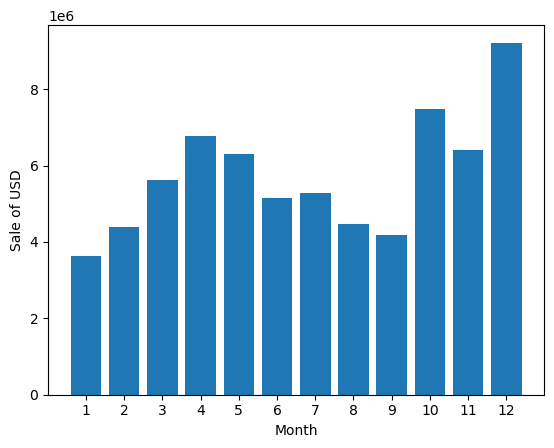

In [95]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sale of USD')

## Add column 'City' having City

In [96]:
all_data['City']=all_data['Purchase_Address'].apply(lambda x:x.split(',')[1])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco
468434,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta


## Add column 'City' having City and state

In [97]:
all_data['City']=all_data['Purchase_Address'].apply(lambda x:x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
466271,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",1,11.99,New York City NY
467081,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco CA
468434,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",1,150.00,New York City NY
469088,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas TX
468441,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta GA


## Group City and summerize the total sales in each city

In [98]:
all_data_gbcity=all_data.groupby('City')

In [99]:
all_data.groupby('City').Sales.sum()

City
 Atlanta GA           5588398.14
 Austin TX            3636088.66
 Boston MA            7317255.30
 Dallas TX            5530747.92
 Los Angeles CA      10896608.56
 New York City NY     9323734.28
 Portland ME           898642.76
 Portland OR          3740021.12
 San Francisco CA    16509487.10
 Seattle WA           5490092.04
Name: Sales, dtype: float64

In [100]:
results_sale_city=all_data.groupby('City').sum()
results_sale_city.head(10)

,Quantity_Ordered,Price_Each,Month,Sales
City,,,,
Atlanta GA,33168,5557217.38,209298,5588398.14
Austin TX,22274,3616680.06,139440,3636088.66
Boston MA,44988,7268796.80,281796,7317255.30
Dallas TX,33414,5500052.76,208894,5530747.92
Los Angeles CA,66494,10834343.40,416040,10896608.56
New York City NY,55806,9265841.08,351114,9323734.28
Portland ME,5492,893504.72,34238,898642.76
Portland OR,22582,3719672.88,141034,3740021.12
San Francisco CA,100338,16408002.76,629898,16509487.10


## Make bar graph of sales in each city

Text(0, 0.5, 'Sale of USD')

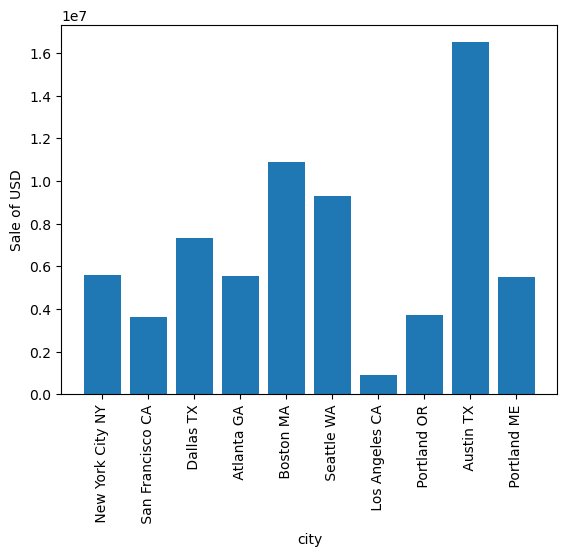

In [101]:
cities=all_data['City'].unique()
plt.bar(cities,results_sale_city['Sales'])
plt.xticks(cities,rotation = 'vertical')
plt.xlabel('city')
plt.ylabel('Sale of USD')

Text(0, 0.5, 'Sale of USD')

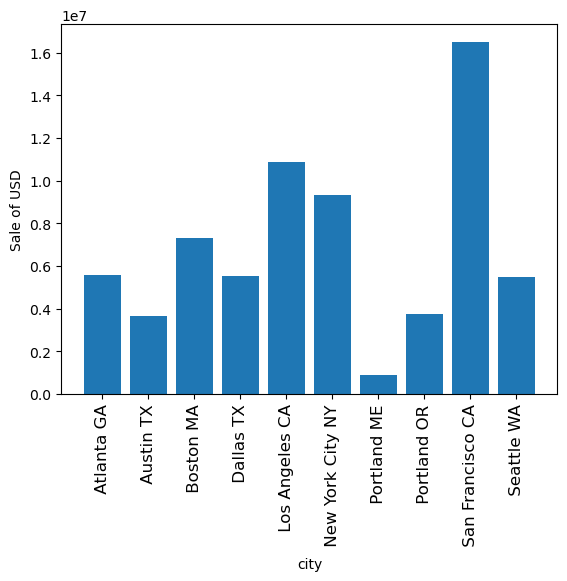

In [102]:
cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,results_sale_city['Sales'])
plt.xticks(cities,rotation='vertical', size = 12)
plt.xlabel('city')
plt.ylabel('Sale of USD')

## Add Hour and Minute columns to caculate the peak order time

In [104]:
all_data['Order_Date']=pd.to_datetime(all_data['Order_Date'])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
466271,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City NY
467081,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco CA
468434,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City NY
469088,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas TX
468441,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta GA


In [105]:
all_data['Hour']=all_data['Order_Date'].dt.hour
all_data['Minute']=all_data['Order_Date'].dt.minute

In [106]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
466271,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City NY,3,7
467081,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco CA,3,40
468434,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City NY,4,56
469088,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas TX,5,53
468441,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta GA,6,3


In [107]:
all_data_gbhour=all_data.groupby('Hour')
all_data_gbhour.sum()

,Quantity_Ordered,Price_Each,Month,Sales,Minute
Hour,,,,,
0,8840,1418248.18,54954,1427097.32,206626
1,5232,916374.04,33286,921127.80,123398
2,2794,467643.30,17004,469678.90,64972
3,1854,289422.94,11806,291485.88,46086
4,1870,323886.48,12270,325092.14,53660
5,2984,459212.52,18596,461329.74,85744
6,5618,889700.24,35056,895926.02,160602
7,9094,1479562.62,57574,1488134.64,254256
8,13996,2371861.70,87210,2384618.40,396018


## Make plot graph to visualize the order peak time

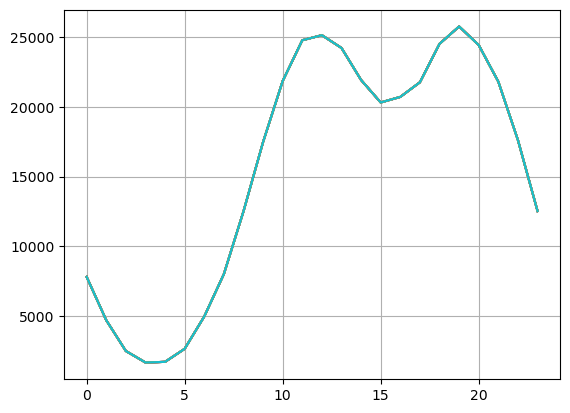

In [108]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.grid()
plt.show()

## Create a table which can show any orders have more than one item

In [110]:
all_data_duplicated=all_data[all_data['Order_ID'].duplicated(keep=False)]


In [116]:
all_data_duplicated.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
463691,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City NY,7,29
463690,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City NY,7,29
467117,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta GA,11,25
467116,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta GA,11,25
467503,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,700.00,Dallas TX,12,2


## Compare the differences between extracting the orders have two and more items and original one

In [117]:
print(all_data_duplicated.shape)
print(all_data.shape)

(68746, 11)
(371372, 11)


In [118]:
all_data_duplicated.to_csv('all_data_duplicatedID.csv')

In [138]:
all_data.to_csv('all_data_backup.csv')

## Create a table to combine the items in the same order

In [119]:
all_data_duplicated['Grouped'] = all_data_duplicated.groupby('Order_ID')['Product'].transform(lambda x:', '.join(x))
all_data_duplicated.head()

C:\Users\jliu020\AppData\Local\Temp/ipykernel_4848/1334067079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_duplicated['Grouped'] = all_data_duplicated.groupby('Order_ID')['Product'].transform(lambda x:', '.join(x))


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute,Grouped
463691,144804,Wired Headphones,1,11.99,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,11.99,New York City NY,7,29,"Wired Headphones, iPhone"
463690,144804,iPhone,1,700.00,2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001",1,700.00,New York City NY,7,29,"Wired Headphones, iPhone"
467117,148074,USB-C Charging Cable,1,11.95,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,11.95,Atlanta GA,11,25,"USB-C Charging Cable, Google Phone"
467116,148074,Google Phone,1,600.00,2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301",1,600.00,Atlanta GA,11,25,"USB-C Charging Cable, Google Phone"
467503,148450,iPhone,1,700.00,2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001",1,700.00,Dallas TX,12,2,"iPhone, Lightning Charging Cable"


In [120]:
all_data_groupedID=all_data_duplicated[['Order_ID','Grouped']].drop_duplicates()

In [121]:
all_data_groupedID.head()

,Order_ID,Grouped
463691,144804,"Wired Headphones, iPhone"
467117,148074,"USB-C Charging Cable, Google Phone"
467503,148450,"iPhone, Lightning Charging Cable"
463556,144679,"Google Phone, USB-C Charging Cable"
466464,147451,"Google Phone, Wired Headphones"


In [122]:
all_data_groupedID.to_csv('all_data_groupedID.csv')

## Using itertools and collections two tools to find out which combination is the most

In [123]:
from itertools import combinations
from collections import Counter

In [124]:
count = Counter()
for row in all_data_groupedID['Grouped']:
    row_list=row.split(', ')
    count.update(Counter(combinations(row_list,3)))
for key, value in count.most_common(20):
    print(key,value)

('Lightning Charging Cable', 'iPhone', 'Lightning Charging Cable') 116
('USB-C Charging Cable', 'Google Phone', 'USB-C Charging Cable') 105
('Google Phone', 'USB-C Charging Cable', 'Google Phone') 101
('iPhone', 'Lightning Charging Cable', 'iPhone') 80
('iPhone', 'Wired Headphones', 'iPhone') 61
('Lightning Charging Cable', 'iPhone', 'iPhone') 60
('iPhone', 'iPhone', 'Lightning Charging Cable') 56
('Google Phone', 'Google Phone', 'USB-C Charging Cable') 53
('Wired Headphones', 'iPhone', 'Wired Headphones') 53
('Wired Headphones', 'Google Phone', 'Wired Headphones') 53
('Wired Headphones', 'USB-C Charging Cable', 'Google Phone') 52
('USB-C Charging Cable', 'Google Phone', 'Google Phone') 52
('Google Phone', 'USB-C Charging Cable', 'USB-C Charging Cable') 51
('Apple Airpods Headphones', 'iPhone', 'Apple Airpods Headphones') 50
('USB-C Charging Cable', 'USB-C Charging Cable', 'Google Phone') 50
('Vareebadd Phone', 'USB-C Charging Cable', 'Vareebadd Phone') 47
('Google Phone', 'USB-C Charg

In [125]:
count = Counter()
for row in all_data_groupedID['Grouped']:
    row_list=row.split(', ')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(20):
    print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable') 2611
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 2543
('Lightning Charging Cable', 'Lightning Charging Cable') 2505
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 2413
('Wired Headphones', 'Wired Headphones') 2228
('Apple Airpods Headphones', 'Apple Airpods Headphones') 1797
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1589
('Lightning Charging Cable', 'iPhone') 1116
('iPhone', 'Lightning Charging Cable') 1102
('USB-C Charging Cable', 'Google Phone') 1101
('Google Phone', 'USB-C Charging Cable') 1099
('27in FHD Monitor', '27in FHD Monitor') 839
('iPhone', 'iPhone') 789
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 747
('34in Ultrawide Monitor', '34in Ultrawide Monitor') 746
('Google Phone', 'Google Phone') 630
('Flatscreen TV', 'Flatscreen TV') 572
('Macbook Pro Laptop', 'Macbook Pro Laptop') 557
('Wired Headphones', 'iPhone') 532
('iPhone', 'Wired Headphones') 506


In [157]:
all_data.sort_values('Order_ID',ascending=False)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
55510,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,Los Angeles CA,21,45
55509,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas TX,10,39
55508,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle WA,6,43
55507,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles CA,12,1
55506,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco CA,20,58
...,...,...,...,...,...,...,...,...,...,...,...
67551,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59
67550,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
67549,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
67548,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15


In [126]:
all_data.isnull().values.any()
all_data.isnull().mean()


Order_ID            0.0
Product             0.0
Quantity_Ordered    0.0
Price_Each          0.0
Order_Date          0.0
Purchase_Address    0.0
Month               0.0
Sales               0.0
City                0.0
Hour                0.0
Minute              0.0
dtype: float64

In [127]:
all_data.describe()

,Quantity_Ordered,Price_Each,Month,Sales,Hour,Minute
count,371372.000000,371372.000000,371372.000000,371372.000000,371372.000000,371372.000000
mean,1.124544,184.519255,7.058653,185.611936,14.412934,29.480537
std,0.443068,332.843390,3.502928,333.031670,5.423322,17.317658
min,1.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000,14.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000,29.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000,45.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000,59.000000


## Create a table to find out which proudct is ordered most or top n

In [128]:
product_group=all_data.groupby('Product')
product_group.sum().sort_values('Product')

,Quantity_Ordered,Price_Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,8252,901478.04,58638,907637.48,117458,244192
27in 4K Gaming Monitor,12478,4855375.50,88792,4866295.22,181682,368258
27in FHD Monitor,15082,2249250.04,104968,2262149.18,214844,439318
34in Ultrawide Monitor,12384,4692116.52,86516,4705796.16,177914,366636
AA Batteries (4-pack),55230,157885.44,290846,212083.20,596154,1217120
AAA Batteries (4-pack),61972,123259.76,292298,185296.28,593808,1222700
Apple Airpods Headphones,31274,4657500.00,218608,4691100.00,445876,909870
Bose SoundSport Headphones,26860,2659334.04,187836,2685731.40,384154,783334
Flatscreen TV,9626,2876400.00,68344,2887800.00,137438,285258


([<matplotlib.axis.XTick at 0x1fd1d04e5e0>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

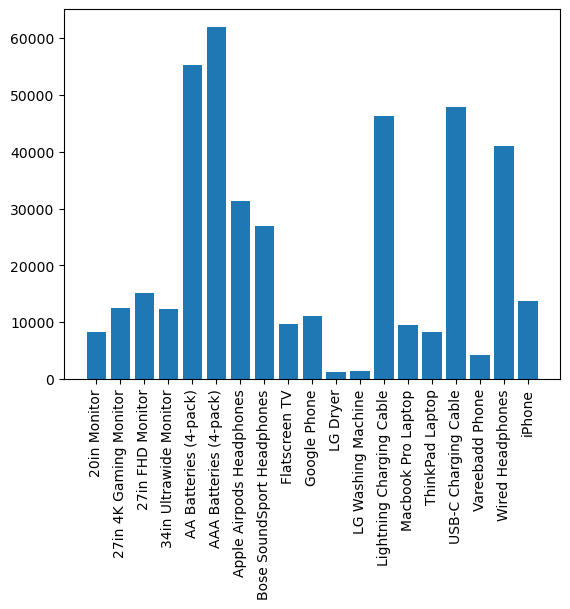

In [129]:
quantity_ordered=product_group.sum()['Quantity_Ordered']

products=[product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical')

## Compare the amout of product ordered with the price of the prodcut

## It can explain the reason why some products were order more often

In [130]:
prices=all_data.groupby('Product').mean()['Price_Each']
prices1=all_data.groupby('Product')['Product','Price_Each']

C:\Users\jliu020\AppData\Local\Temp/ipykernel_4848/2512888848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prices1=all_data.groupby('Product')['Product','Price_Each']


In [131]:
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price_Each, dtype: float64

C:\Users\jliu020\AppData\Local\Temp/ipykernel_4848/1277011754.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


<function matplotlib.pyplot.show(close=None, block=None)>

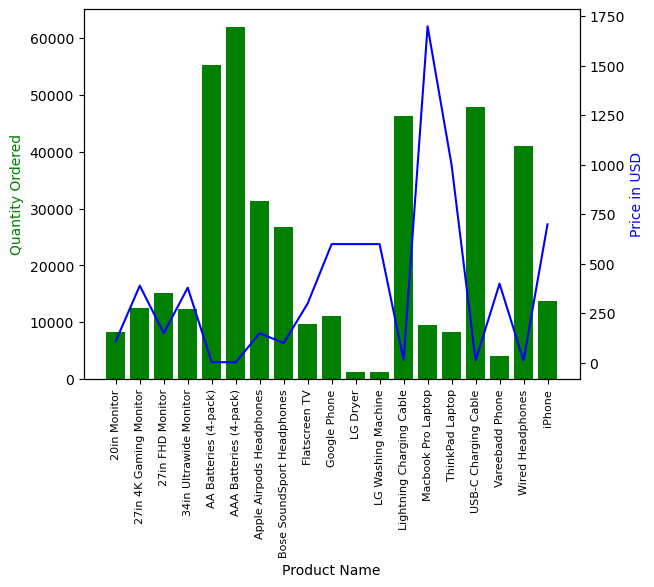

In [132]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price in USD',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show